#Model Eval & Download

This colab demonstrates how to extract the AudioSet embeddings, using a VGGish deep neural network (DNN).

Based on the directions at: https://github.com/tensorflow/models/tree/master/research/audioset

In [1]:
!lscpu
!nvidia-smi

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2200.000
BogoMIPS:            4400.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

In [2]:
#Google drive access
import os
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

#Directory
root_path = 'gdrive/My Drive/SoundEventDetection/modelTraining'
os.chdir(root_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!pip install --upgrade youtube-dl

     |████████████████████████████████| 1.8MB 4.6MB/s 


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import youtube_dl
from lib import download_mp3

# Evaluate

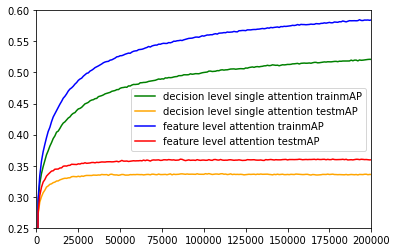

In [5]:
f = "trained_models/200k_DLSA_B.csv"
df = pd.read_csv(f)

fig, ax = plt.subplots()
ax.margins(0.05)
ax.plot(df['iteration'], df['trainmAP'], marker='', linestyle='-', ms=6,color='green',label='decision level single attention trainmAP')
ax.plot(df['iteration'], df['testmAP'], marker='', linestyle='-', ms=6,color='orange',label='decision level single attention testmAP')

f = "trained_models/200k_FLA_B.csv"
df = pd.read_csv(f)
ax.plot(df['iteration'], df['trainmAP'], marker='', linestyle='-', ms=6,color='blue',label='feature level attention trainmAP')
ax.plot(df['iteration'], df['testmAP'], marker='', linestyle='-', ms=6,color='red',label='feature level attention testmAP')

plt.xlim((0, 200000))
plt.ylim((0.25, 0.6))

ax.legend()
plt.show()

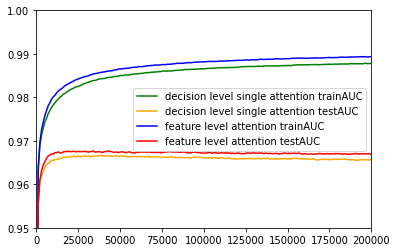

In [6]:
f = "trained_models/200k_DLSA_B.csv"
df = pd.read_csv(f)

fig, ax = plt.subplots()
ax.margins(0.05)
ax.plot(df['iteration'], df['trainAUC'], marker='', linestyle='-', ms=6,color='green',label='decision level single attention trainAUC')
ax.plot(df['iteration'], df['testAUC'], marker='', linestyle='-', ms=6,color='orange',label='decision level single attention testAUC')

f = "trained_models/200k_FLA_B.csv"
df = pd.read_csv(f)
ax.plot(df['iteration'], df['trainAUC'], marker='', linestyle='-', ms=6,color='blue',label='feature level attention trainAUC')
ax.plot(df['iteration'], df['testAUC'], marker='', linestyle='-', ms=6,color='red',label='feature level attention testAUC')

plt.xlim((0, 200000))
plt.ylim((0.95, 1))
ax.legend()
plt.show()

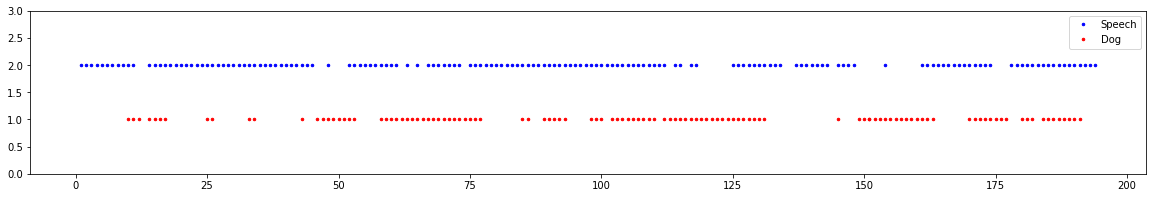

In [8]:

plt.rcParams["figure.figsize"] = (20,3)

f = "output/dogprobsld.csv"
df = pd.read_csv(f)
fig, ax = plt.subplots()
ax.plot(df[df['Class']==0]['Second'],df[df['Class']==0]['Class']+2, marker='.', linestyle='', ms=5,color='blue', label="Speech") 
ax.plot(df[df['Class']==74]['Second'],df[df['Class']==74]['Class']-73, marker='.', linestyle='', ms=5,color='red', label="Dog")
plt.ylim((0, 3))
ax.legend()
plt.show()

# Download WAV

In [0]:
#link,fileName = "https://www.youtube.com/watch?v=bHWgc5MPnPA","car"

#link,fileName = "https://www.youtube.com/watch?v=CyNjFWad3u0", "dogpark"

link,fileName = "https://www.youtube.com/watch?v=3xCWI_22Z9A", "dog"

In [11]:
fileDestination = "output/" + fileName
download_mp3.downloadYoutube(link,fileDestination + ".f")

[youtube] 3xCWI_22Z9A: Downloading webpage
[download] Destination: output/dog.f
[download] 100% of 2.30MiB in 00:00
[ffmpeg] Destination: output/dog.wav
Deleting original file output/dog.f (pass -k to keep)
